To kick off your project systematically, here’s a structured plan:

### Step 1: **Data Exploration and Preprocessing**
   - **Load Data**: Load and inspect the dataset, checking for null values and data types for each column.
   - **Target Column Analysis**: Plot the distribution of the `JobSat` column (as you’ve done) and confirm if the reclassification strategy is viable.

### Step 2: **Reclassify Job Satisfaction Levels**
   - As per the distribution, reclassify `JobSat` into three categories to create balanced classes. Map the satisfaction levels into the classes:
     - Low Satisfaction: 0-4 → Class 0
     - Medium Satisfaction: 5-7 → Class 1
     - High Satisfaction: 8-10 → Class 2

### Step 3: **Multi-Label Column Identification and Tokenization**
   - **Identify Multi-Label Columns**: Check each column to see if it contains multiple labels (using a separator like `;`).
   - **Tokenize Multi-Label Columns**: For each identified multi-label column, create a tokenizer to convert labels to integer sequences and save vocabulary sizes and maximum sequence lengths for embedding.

### Step 4: **Non-Multi-Label Column Encoding and Scaling**
   - **Categorical Encoding**: Use label encoding for non-multi-label categorical columns.
   - **Numerical Scaling**: Apply standard scaling to numerical columns for consistency across inputs.

### Step 5: **Data Splitting and Preparation for Model Input**
   - **Train-Test Split**: Perform a stratified train-test split based on the newly classified `JobSat` column.
   - **Sequence Padding**: Pad the tokenized sequences for multi-label columns to ensure uniform input lengths.

### Step 6: **Model Building and Embedding Layers**
   - **Define Inputs and Embedding Layers**: Set up input and embedding layers for each multi-label column based on the vocabulary size and maximum sequence length determined.
   - **Concatenate and Build Model Architecture**: Combine multi-label and non-multi-label features into a single model structure with dense layers, dropout, and output layers.

### Step 7: **Class Weight Calculation and Metric Definition**
   - **Compute Class Weights**: Use class weights to handle imbalanced classes in the target variable.
   - **Metrics Selection**: Include metrics like accuracy, precision, recall, F1-score, and AUC for evaluation.

### Step 8: **Model Training with Early Stopping**
   - Train the model with early stopping to prevent overfitting, while tracking validation performance.

### Step 9: **Evaluation on Test Set**
   - Evaluate the model on the test set and generate a confusion matrix, classification report, and ROC curves for deeper insights into each class’s performance.

### Step 10: **Further Analysis and Adjustments**
   - Based on test performance, assess areas for potential improvement (e.g., adjusting embedding dimensions, trying additional balancing techniques, or using PCA for correlated features).

Would you like to start with Step 1, or is there a specific step where you’d like to focus first?

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)



In [152]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load dataset
data = pd.read_csv('survey_results_public.csv')


In [153]:
# Check data structure
print("Dataset shape:", data.shape)
print("Data types:\n", data.dtypes.value_counts())
print("\nSummary statistics:\n", data.describe())


Dataset shape: (65437, 114)
Data types:
 object     100
float64     13
int64        1
Name: count, dtype: int64

Summary statistics:
          ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29450.000000     29448.00000   
mean         7.522140       10.060857       24.343232        22.96522   
std         18.422661       21.833

C:\Users\msn\AppData\Local\Temp\ipykernel_8776\2507153940.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='JobSat', data=data, palette="viridis")


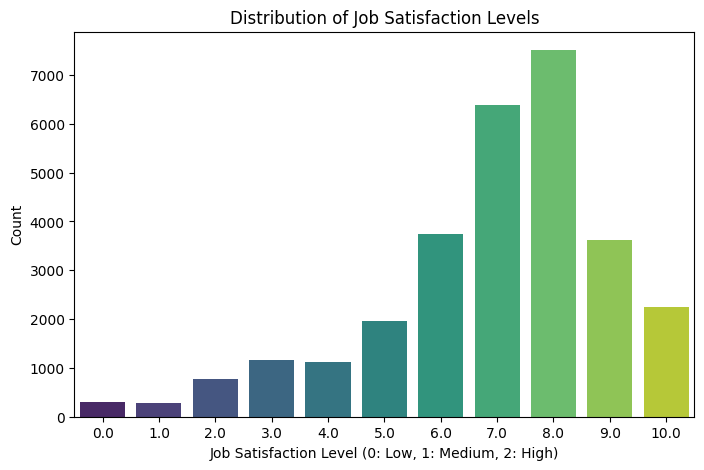

In [154]:
plt.figure(figsize=(8, 5))
sns.countplot(x='JobSat', data=data, palette="viridis")
plt.title("Distribution of Job Satisfaction Levels")
plt.xlabel("Job Satisfaction Level (0: Low, 1: Medium, 2: High)")
plt.ylabel("Count")
plt.show()


In [155]:
# Display the first few rows to get an overview of the data
print(data.head())

# List all column names in the dataset
print("\nColumn names in the dataset:")
print(data.columns.tolist())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

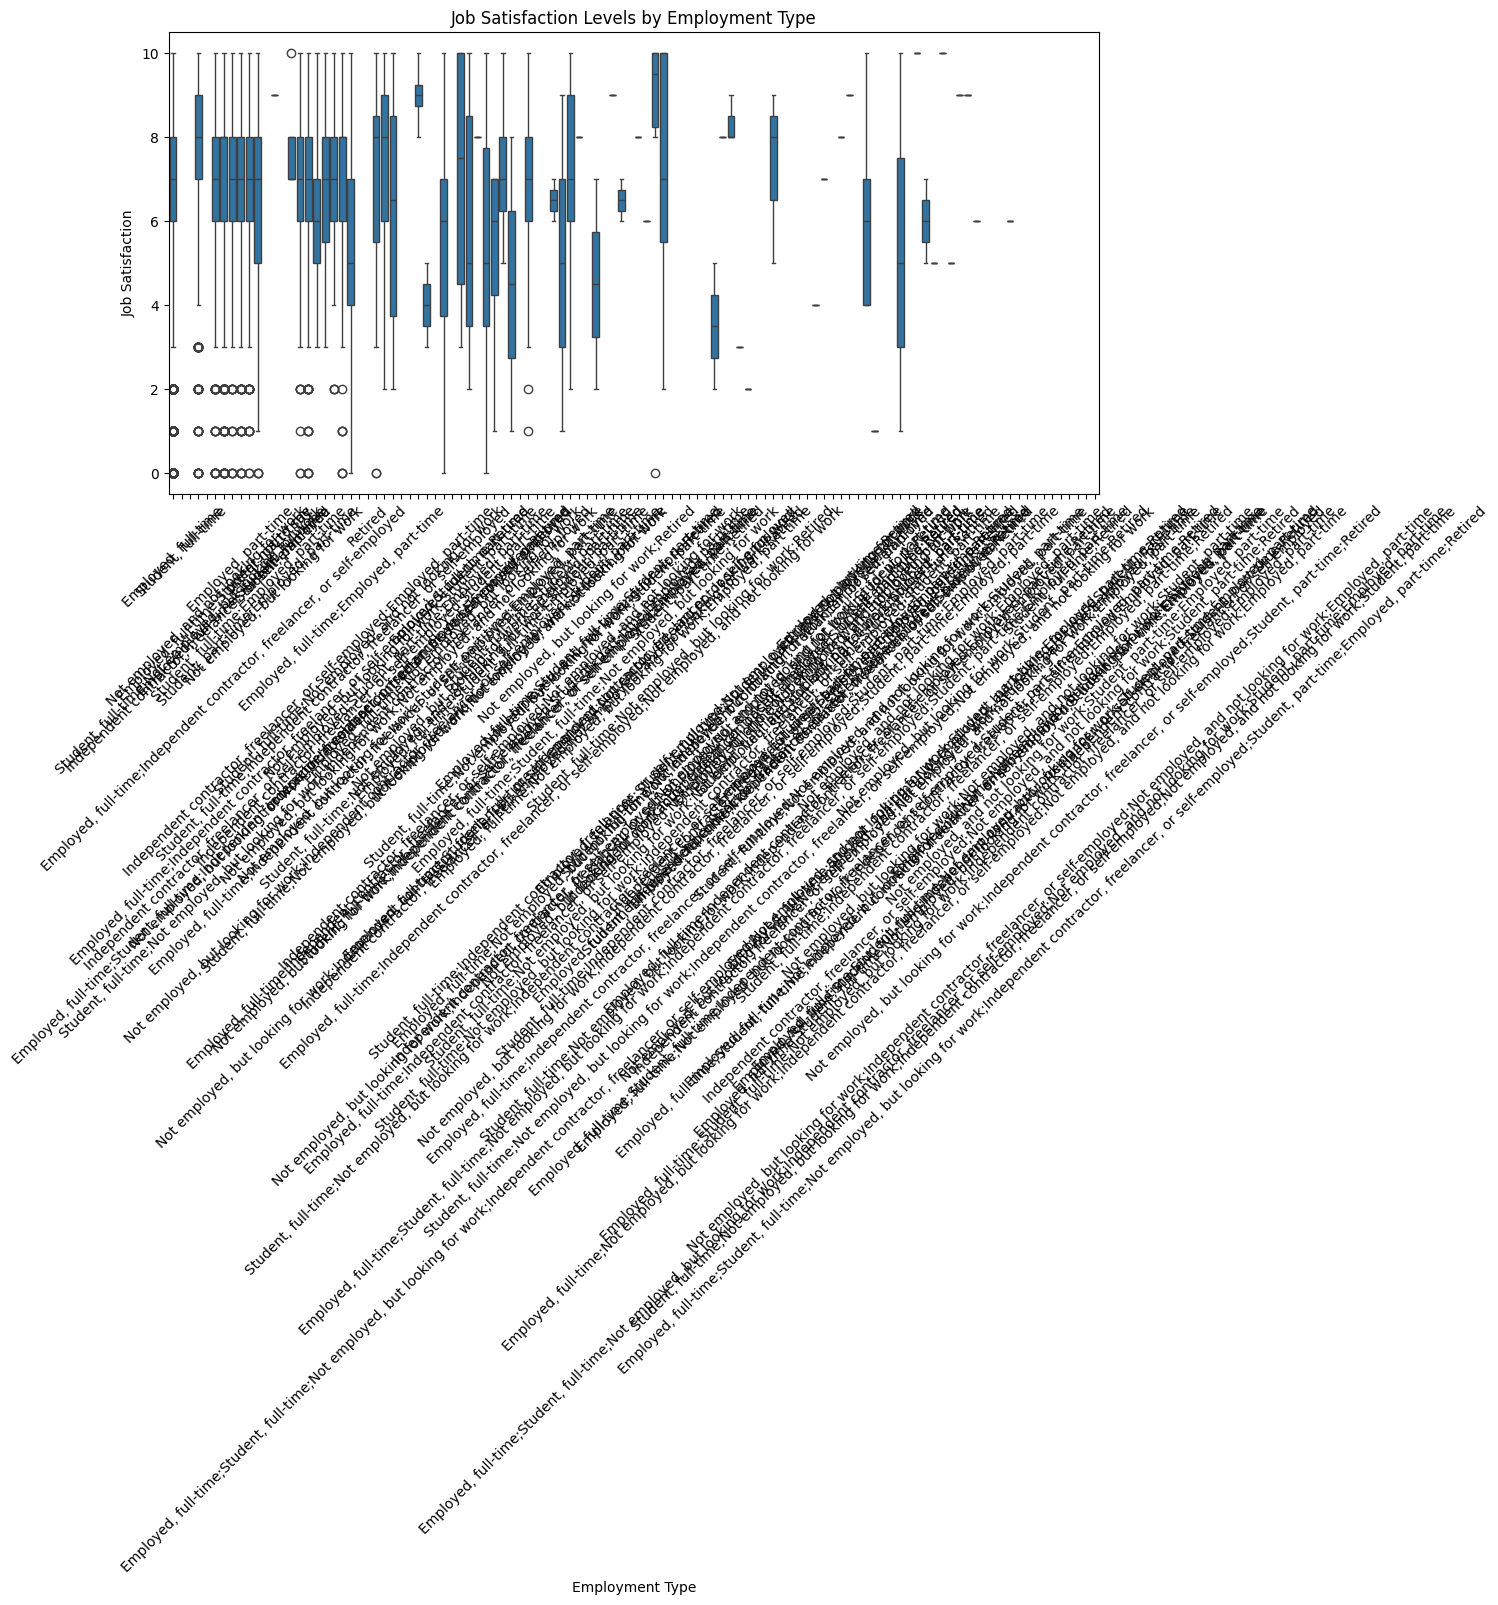

In [156]:
# Visualization 2: Job Satisfaction by Employment Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Employment', y='JobSat', data=data)
plt.title("Job Satisfaction Levels by Employment Type")
plt.xticks(rotation=45)
plt.xlabel("Employment Type")
plt.ylabel("Job Satisfaction")
plt.show()

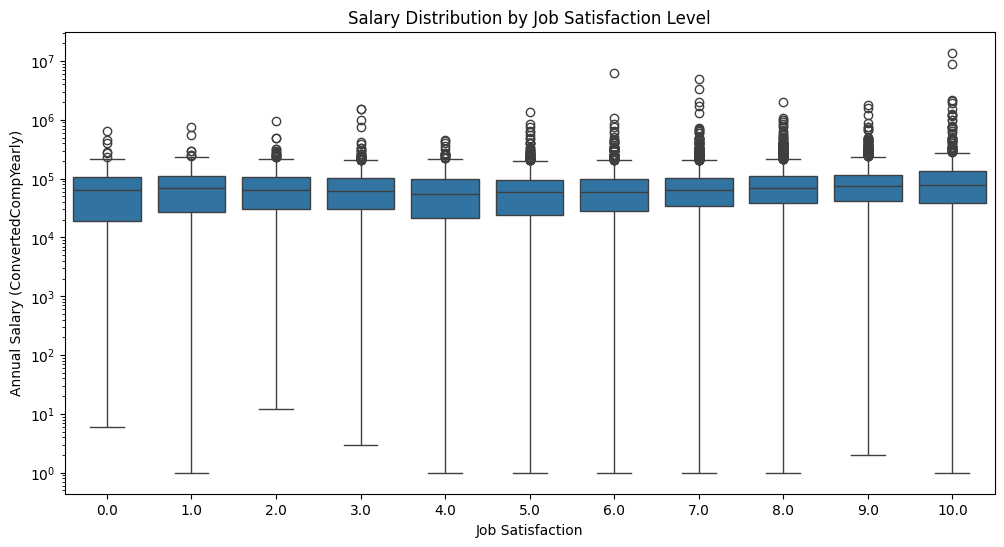

In [157]:
# Visualization 3: Salary Distribution (ConvertedCompYearly) for Satisfaction Levels
plt.figure(figsize=(12, 6))
sns.boxplot(x='JobSat', y='ConvertedCompYearly', data=data)
plt.title("Salary Distribution by Job Satisfaction Level")
plt.xlabel("Job Satisfaction")
plt.ylabel("Annual Salary (ConvertedCompYearly)")
plt.yscale("log")  # Apply log scale for clearer visualization if salary data is skewed
plt.show()

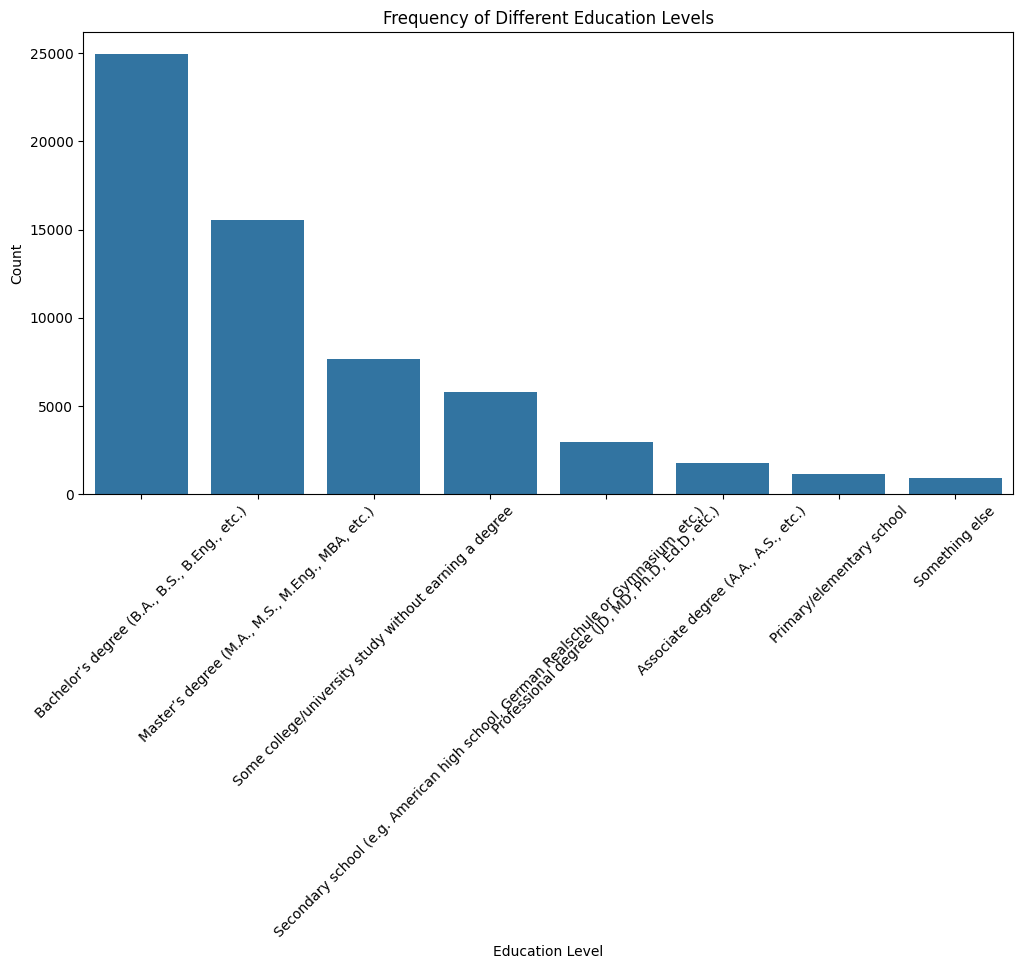

In [158]:
# Visualization 4: Frequency of Education Levels
plt.figure(figsize=(12, 6))
sns.countplot(x='EdLevel', data=data, order=data['EdLevel'].value_counts().index)
plt.title("Frequency of Different Education Levels")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

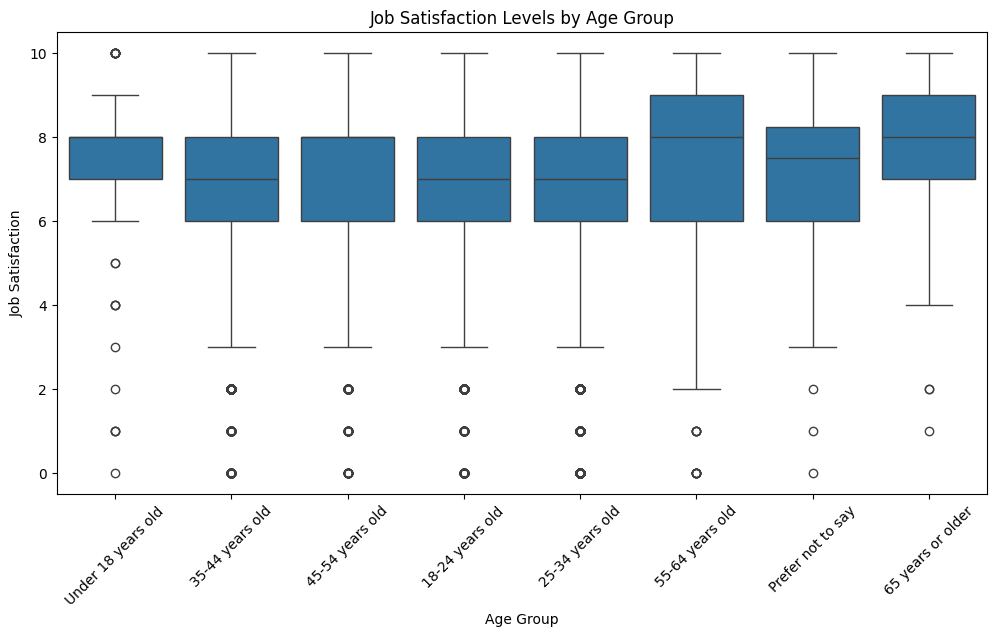

In [159]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='JobSat', data=data)
plt.title("Job Satisfaction Levels by Age Group")
plt.xticks(rotation=45)
plt.xlabel("Age Group")
plt.ylabel("Job Satisfaction")
plt.show()


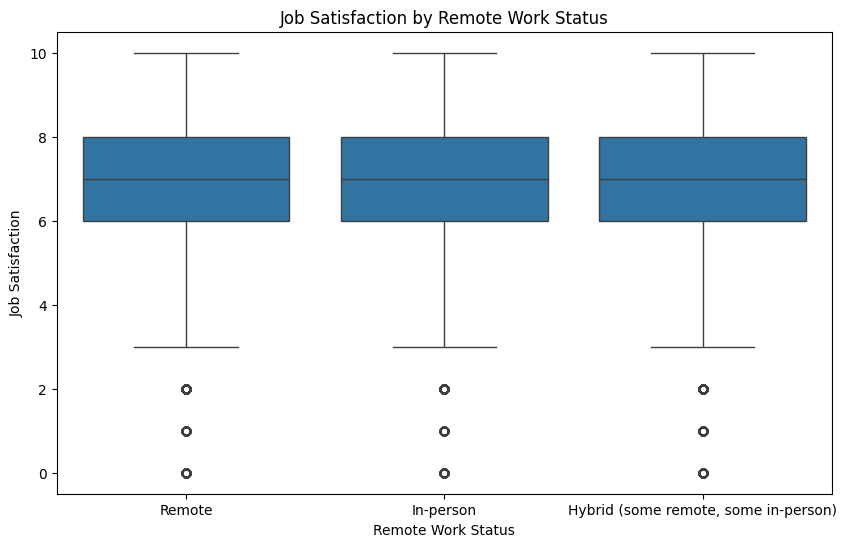

In [160]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='RemoteWork', y='JobSat', data=data)
plt.title("Job Satisfaction by Remote Work Status")
plt.xlabel("Remote Work Status")
plt.ylabel("Job Satisfaction")
plt.show()


In [161]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


ValueError: could not convert string to float: 'I am a developer by profession'

<Figure size 1200x1000 with 0 Axes>

In [ ]:
import re

# Define a mapping to simplify terms
simplifications = {
    "Contribute to open-source projects": "Open Source",
    "Professional development or self-paced learning from online courses": "Self-Learning",
    "Freelance/contract work": "Freelance",
    "School or academic work": "Academic",
    "Bootstrapping a business": "Startup",
    "Other (please specify):": "Other",
    "Hobby": "Hobby"
}

# Function to simplify terms in CodingActivities
def simplify_text(text):
    if pd.isna(text):
        return text
    for long_term, short_term in simplifications.items():
        text = re.sub(long_term, short_term, text)
    return text

# Apply the function to the CodingActivities column
data['CodingActivities'] = data['CodingActivities'].apply(simplify_text)

# Check the unique values after simplification
unique_values = data['CodingActivities'].unique()
print("Simplified unique CodingActivities values:")
print(unique_values)


Simplified unique CodingActivities values:
['Hobby' 'Hobby;Open Source;Other (please specify):' nan
 'I don’t code outside of work' 'Startup' 'Hobby;Open Source'
 'Hobby;Academic' 'Hobby;Open Source;Self-Learning' 'Hobby;Self-Learning'
 'Open Source;Other (please specify):' 'Open Source' 'Hobby;Freelance'
 'Self-Learning' 'Hobby;Other (please specify):;Startup' 'Freelance'
 'Open Source;Startup;Academic' 'Open Source;Startup;Freelance'
 'Hobby;Open Source;Startup;Self-Learning' 'Hobby;Academic;Freelance'
 'Hobby;Open Source;Academic' 'Hobby;Academic;Self-Learning;Freelance'
 'Open Source;Self-Learning' 'Hobby;Open Source;Freelance'
 'Startup;Self-Learning;Freelance' 'Hobby;Other (please specify):'
 'Other (please specify):;Self-Learning'
 'Hobby;Open Source;Academic;Self-Learning' 'Startup;Freelance'
 'Open Source;Startup;Academic;Freelance' 'Hobby;Startup;Freelance'
 'Open Source;Self-Learning;Freelance'
 'Hobby;Open Source;Self-Learning;Freelance'
 'Hobby;Other (please specify):;Free

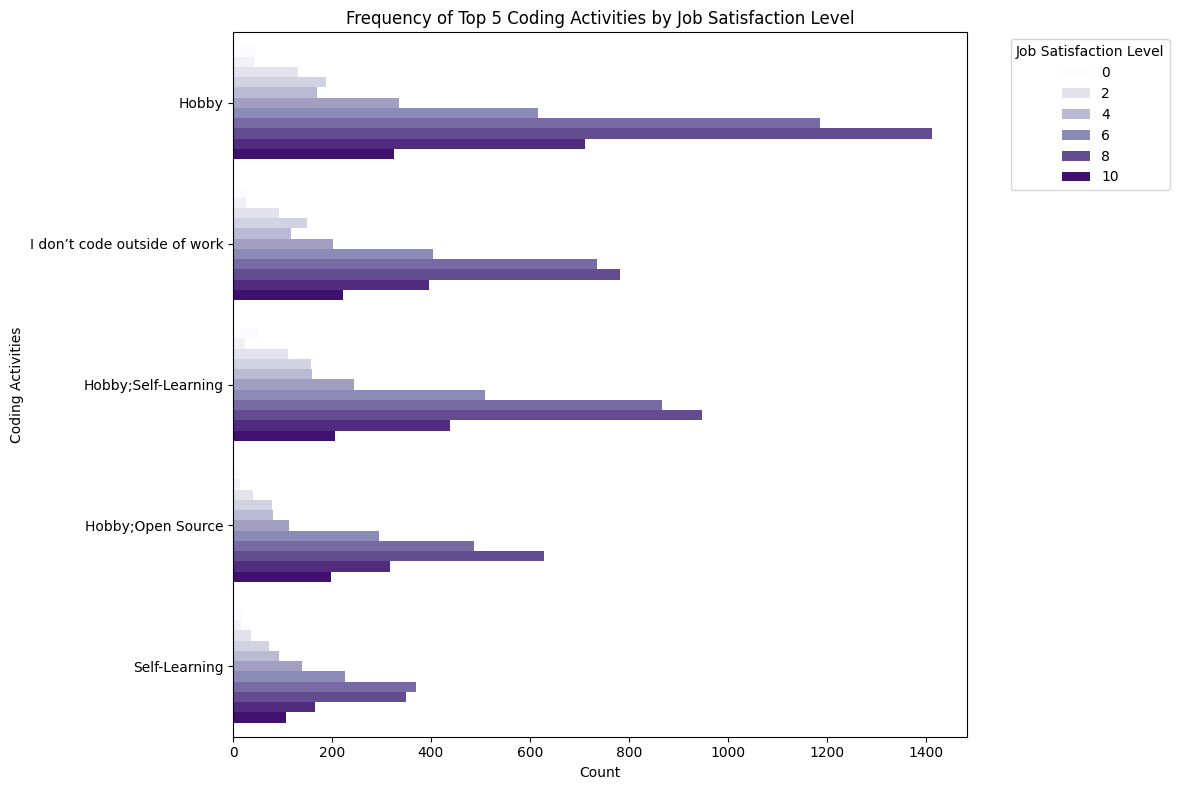

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Simplify by showing the top 15 most common activities
top_activities = data['CodingActivities'].value_counts().nlargest(5).index
filtered_data = data[data['CodingActivities'].isin(top_activities)]

plt.figure(figsize=(12, 8))
sns.countplot(
    y='CodingActivities', 
    hue='JobSat', 
    data=filtered_data, 
    order=top_activities,
    palette="Purples"
)
plt.title("Frequency of Top 5 Coding Activities by Job Satisfaction Level")
plt.xlabel("Count")
plt.ylabel("Coding Activities")
plt.legend(title="Job Satisfaction Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
data['OrgSize'].unique()

array([nan, '100 to 499 employees', '2 to 9 employees',
       'Just me - I am a freelancer, sole proprietor, etc.',
       '10 to 19 employees', '20 to 99 employees',
       '5,000 to 9,999 employees', '1,000 to 4,999 employees',
       'I don’t know', '10,000 or more employees', '500 to 999 employees'],
      dtype=object)

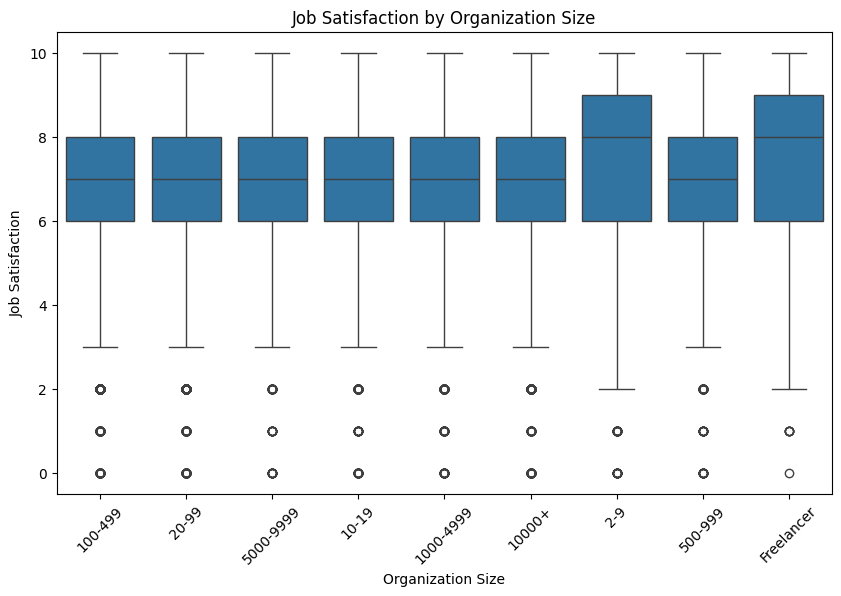

In [ ]:
# Replace long labels with shorter ones for better readability
size_mapping = {
    '100 to 499 employees': '100-499',
    '2 to 9 employees': '2-9',
    'Just me - I am a freelancer, sole proprietor, etc.': 'Freelancer',
    '10 to 19 employees': '10-19',
    '20 to 99 employees': '20-99',
    '5,000 to 9,999 employees': '5000-9999',
    '1,000 to 4,999 employees': '1000-4999',
    'I don’t know': 'Unknown',
    '10,000 or more employees': '10000+',
    '500 to 999 employees': '500-999'
}

# Apply the mapping and create a new column for shorter labels
data['OrgSize'] = data['OrgSize'].map(size_mapping)

# Filter out rows with "Unknown" or NaN in OrgSize_Short and NaN in JobSat
filtered_data = data[(data['OrgSize'].notna()) & (data['OrgSize'] != 'Unknown') & (data['JobSat'].notna())]

# Plotting with the updated and filtered data
plt.figure(figsize=(10, 6))
sns.boxplot(x='OrgSize', y='JobSat', data=filtered_data)
plt.title("Job Satisfaction by Organization Size")
plt.xticks(rotation=45)
plt.xlabel("Organization Size")
plt.ylabel("Job Satisfaction")
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


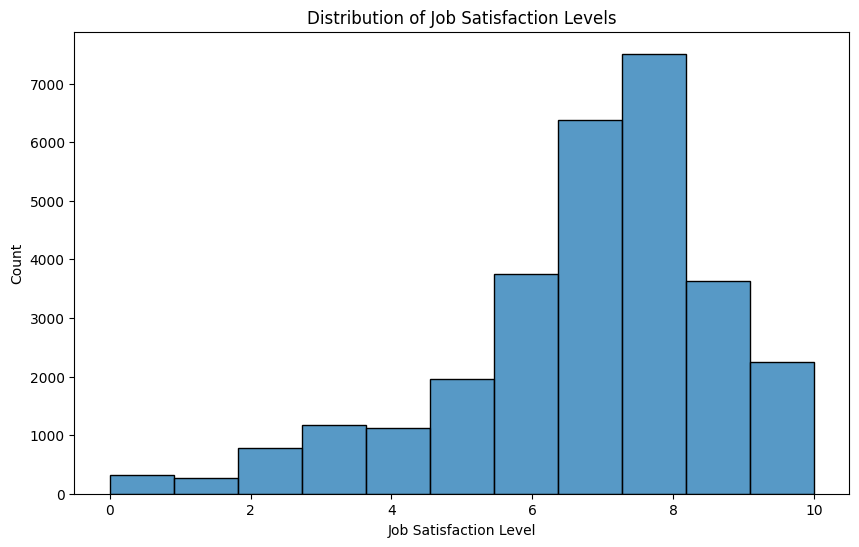

(None,
 ResponseId                 0
 MainBranch                 0
 Age                        0
 Employment                 0
 RemoteWork             10631
                        ...  
 JobSatPoints_11        35992
 SurveyLength            9255
 SurveyEase              9199
 ConvertedCompYearly    42002
 JobSat                 36311
 Length: 114, dtype: int64)

In [ ]:
# Step 1: Data Exploration and Preprocessing

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Basic info
data_info = data.info()

# Checking for null values
missing_values = data.isnull().sum()

# Plotting the distribution of Job Satisfaction Levels (target column) before reclassification
plt.figure(figsize=(10, 6))
sns.histplot(data['JobSat'], bins=11, kde=False)
plt.title("Distribution of Job Satisfaction Levels")
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Count")
plt.show()

# Displaying basic information and missing values
data_info, missing_values


C:\Users\msn\AppData\Local\Temp\ipykernel_8776\3845607457.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['JobSat'] = data_cleaned['JobSat'].apply(reclassify_jobsat)
C:\Users\msn\AppData\Local\Temp\ipykernel_8776\3845607457.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_cleaned['JobSat'], palette="viridis")


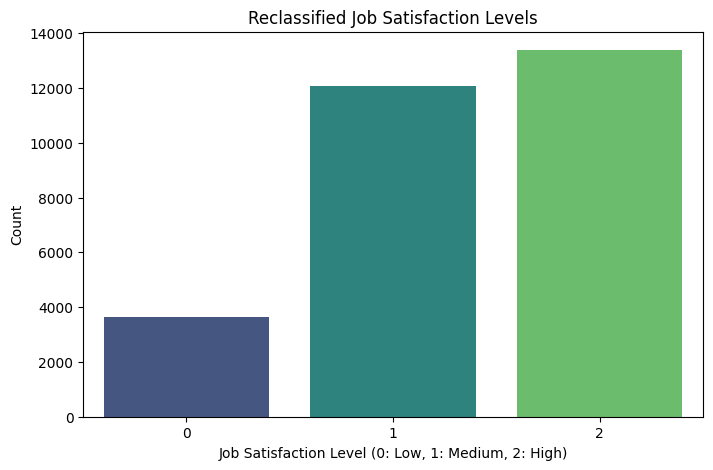

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN

# Step 1: Handling Missing Values by Removing Rows with NaN in `JobSat`
data_cleaned = data.dropna(subset=['JobSat'])

# Step 2: Reclassify `JobSat` into Low (0-4), Medium (5-7), and High (8-10) Satisfaction Levels
def reclassify_jobsat(value):
    if value <= 4:
        return 0  # Low satisfaction
    elif 5 <= value <= 7:
        return 1  # Medium satisfaction
    else:
        return 2  # High satisfaction

data_cleaned['JobSat'] = data_cleaned['JobSat'].apply(reclassify_jobsat)

# Verify the reclassification by plotting the new distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=data_cleaned['JobSat'], palette="viridis")
plt.title("Reclassified Job Satisfaction Levels")
plt.xlabel("Job Satisfaction Level (0: Low, 1: Medium, 2: High)")
plt.ylabel("Count")
plt.show()



In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from sklearn.impute import SimpleImputer
# from imblearn.combine import SMOTEENN
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Step 3: Split data into features and target
# X = data_cleaned.drop(columns=['JobSat'])
# y = data_cleaned['JobSat']

# # Step 4: Separate Categorical Columns Based on Encoding Strategy
# categorical_columns = X.select_dtypes(include=['object']).columns
# low_cardinality_cols = [col for col in categorical_columns if X[col].nunique() <= 10]  # For OneHotEncoding
# high_cardinality_cols = [col for col in categorical_columns if X[col].nunique() > 10]  # For LabelEncoding

# # Step 5: Apply OneHotEncoding to Low Cardinality Columns
# X = pd.get_dummies(X, columns=low_cardinality_cols, drop_first=True)

# # Step 6: Apply LabelEncoding to High Cardinality Columns
# label_encoders = {}
# for col in high_cardinality_cols:
#     le = LabelEncoder()
#     X[col] = le.fit_transform(X[col].astype(str))
#     label_encoders[col] = le

# # Step 7: Split data before resampling to avoid data leakage
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# # Step 8: Impute missing values in X_train
# # Impute numeric columns with mean and categorical columns with most frequent values
# numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
# imputer_numeric = SimpleImputer(strategy="mean")
# X_train[numeric_columns] = imputer_numeric.fit_transform(X_train[numeric_columns])
# X_test[numeric_columns] = imputer_numeric.transform(X_test[numeric_columns])

# from imblearn.over_sampling import SMOTE

# from imblearn.over_sampling import SMOTE

# # Define a sampling strategy that brings the minority classes closer to the majority without making them identical
# smote = SMOTE(sampling_strategy={0: 8000, 1: 10000, 2: 10708}, random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Check new class distribution after Proportional SMOTE resampling
# print("\nClass distribution after Proportional SMOTE resampling:")
# print(y_train_resampled.value_counts())

# # Visualize the resampled class distribution
# plt.figure(figsize=(8, 5))
# sns.countplot(x=y_train_resampled, palette="viridis")
# plt.title("Class Distribution after Proportional SMOTE Resampling")
# plt.xlabel("Job Satisfaction Level (0: Low, 1: Medium, 2: High)")
# plt.ylabel("Count")
# plt.show()




Class distribution after Proportional SMOTE resampling:
JobSat
2    10708
1    10000
0     8000
Name: count, dtype: int64


C:\Users\msn\AppData\Local\Temp\ipykernel_8776\1841629178.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_resampled, palette="viridis")


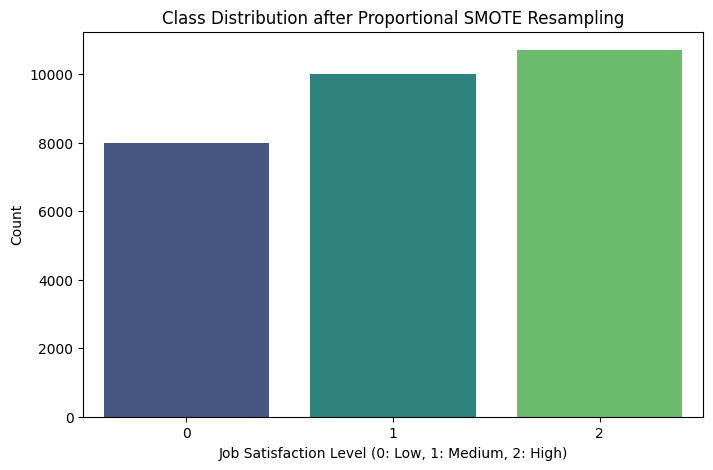

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Split data into features and target before any transformations to avoid leakage
X = data_cleaned.drop(columns=['JobSat'])
y = data_cleaned['JobSat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 2: Identify Categorical Columns and Separate Based on Encoding Strategy
categorical_columns = X.select_dtypes(include=['object']).columns
low_cardinality_cols = [col for col in categorical_columns if X[col].nunique() <= 10]  # For OneHotEncoding
high_cardinality_cols = [col for col in categorical_columns if X[col].nunique() > 10]  # For LabelEncoding

# Step 3: Apply OneHotEncoding to Low Cardinality Columns on Train and Test Separately
X_train = pd.get_dummies(X_train, columns=low_cardinality_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=low_cardinality_cols, drop_first=True)

# Align columns of X_train and X_test to match (important when using get_dummies)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
from sklearn.preprocessing import OrdinalEncoder

# Step 4: Apply Ordinal Encoding to High Cardinality Columns with Unknown Handling
high_cardinality_cols = [col for col in categorical_columns if X[col].nunique() > 10]  # For high cardinality columns
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Apply Ordinal Encoding on training and transform test with unknown handling
X_train[high_cardinality_cols] = ordinal_encoder.fit_transform(X_train[high_cardinality_cols].astype(str))
X_test[high_cardinality_cols] = ordinal_encoder.transform(X_test[high_cardinality_cols].astype(str))

# Continue with imputation and resampling steps as defined earlier

# Step 5: Impute Missing Values Separately on Training and Test Sets
# Impute numeric columns with mean
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
imputer_numeric = SimpleImputer(strategy="mean")
X_train[numeric_columns] = imputer_numeric.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = imputer_numeric.transform(X_test[numeric_columns])

# Step 6: Apply SMOTE with a Proportional Sampling Strategy on the Training Set
smote = SMOTE(sampling_strategy={0: 8000, 1: 10000, 2: 10708}, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE resampling
print("\nClass distribution after Proportional SMOTE resampling:")
print(y_train_resampled.value_counts())

# Visualize the resampled class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_resampled, palette="viridis")
plt.title("Class Distribution after Proportional SMOTE Resampling")
plt.xlabel("Job Satisfaction Level (0: Low, 1: Medium, 2: High)")
plt.ylabel("Count")
plt.show()

# Step 7: Proceed to Model Training and Evaluation
# You can implement cross-validation during model evaluation to further reduce bias


In [ ]:
# Check missing values in each column for the training set after resampling
missing_train_resampled = X_train_resampled.isnull().sum()
print("Missing values in each column of X_train_resampled:")
print(missing_train_resampled[missing_train_resampled > 0])  # Only display columns with missing values

# Check missing values in each column for the test set
missing_test = X_test.isnull().sum()
print("\nMissing values in each column of X_test:")
print(missing_test[missing_test > 0])  # Only display columns with missing values


Missing values in each column of X_train_resampled:
Series([], dtype: int64)

Missing values in each column of X_test:
Series([], dtype: int64)


In [150]:
# Fill missing values with 0 in both training and test sets after encoding
# X_train_resampled.fillna(0, inplace=True)
# X_test.fillna(0, inplace=True)

# Verify there are no remaining missing values
print("Missing values in X_train_resampled after filling:")
print(X_train_resampled.isnull().sum().sum())  # Should be 0 if all missing values are filled

print("Missing values in X_test after filling:")
print(X_test.isnull().sum().sum())  # Should be 0 if all missing values are filled


Missing values in X_train_resampled after filling:
0
Missing values in X_test after filling:
0


In [133]:
X_train_resampled.head()

,ResponseId,Employment,CodingActivities,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,BuyNewTool,...,"ProfessionalQuestion_Do search of internal share drives/storage locations for documentation (i.e., not a structured knowledge base)",ProfessionalQuestion_Internal Developer portal,ProfessionalQuestion_Microsoft Teams search,ProfessionalQuestion_Other:,ProfessionalQuestion_Slack search,ProfessionalQuestion_Traditional public search engine,SurveyLength_Too long,SurveyLength_Too short,SurveyEase_Easy,SurveyEase_Neither easy nor difficult
0,16830.0,0.0,87.0,34.0,2280.0,46.0,44.0,49.0,25.0,103.0,...,False,False,False,False,False,True,False,False,False,True
1,58185.0,0.0,87.0,223.0,5342.0,56.0,46.0,11.0,13.0,145.0,...,False,False,False,False,False,True,False,False,False,True
2,40665.0,0.0,30.0,297.0,1879.0,33.0,47.0,22.0,3.0,57.0,...,False,False,False,False,False,False,False,False,True,False
3,10742.0,52.0,85.0,24.0,2476.0,55.0,33.0,0.0,23.0,145.0,...,False,False,False,False,False,False,False,False,True,False
4,50361.0,0.0,87.0,345.0,3386.0,46.0,12.0,8.0,17.0,177.0,...,False,False,False,False,False,True,True,False,False,False


In [134]:
X_train_resampled.shape

(28708, 213)

In [135]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

Logistic Regression Performance:
Accuracy: 0.55870236869207
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.26      0.31       731
           1       0.52      0.56      0.54      2417
           2       0.62      0.64      0.63      2678

    accuracy                           0.56      5826
   macro avg       0.52      0.49      0.49      5826
weighted avg       0.55      0.56      0.55      5826



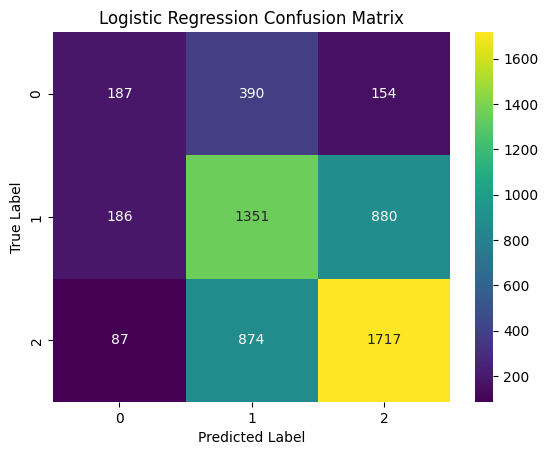

Random Forest Classifier Performance:
Accuracy: 0.5363886028149674
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.14      0.23       731
           1       0.48      0.54      0.51      2417
           2       0.58      0.64      0.61      2678

    accuracy                           0.54      5826
   macro avg       0.54      0.44      0.45      5826
weighted avg       0.54      0.54      0.52      5826



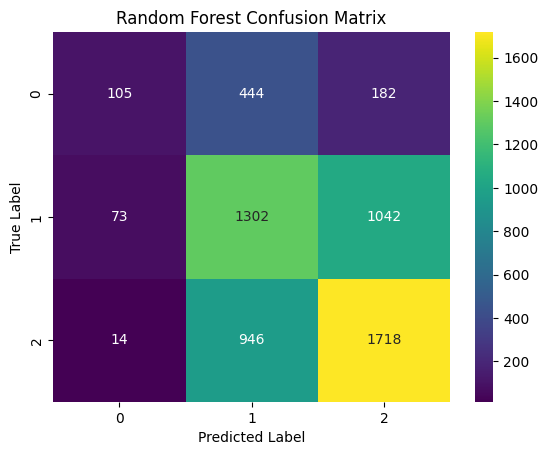

In [44]:
# # Step 1: Replace `inf` and `-inf` values with NaN, then fill with the max/min finite values
# X_train_resampled.replace([np.inf, -np.inf], np.nan, inplace=True)
# X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# # Step 2: Fill any remaining NaN values with 0 as a precaution
# X_train_resampled.fillna(0, inplace=True)
# X_test.fillna(0, inplace=True)

# # Re-check for extreme values by capping large values that may cause overflow
# max_value = np.finfo(np.float32).max
# min_value = np.finfo(np.float32).min

# X_train_resampled = X_train_resampled.clip(lower=min_value, upper=max_value)
# X_test = X_test.clip(lower=min_value, upper=max_value)


# Step 7: Check and Replace Inf/NaN values
X_train_resampled.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train_resampled.fillna(0, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.fillna(0, inplace=True)

# Step 8: Normalize the Data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Now we can proceed with model training
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)
y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt="d", cmap="viridis")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="viridis")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

Epoch 1/100


d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


718/718 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4358 - loss: 1.1103 - val_accuracy: 0.0564 - val_loss: 1.6530
Epoch 2/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4895 - loss: 0.9847 - val_accuracy: 0.0648 - val_loss: 1.5845
Epoch 3/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5138 - loss: 0.9581 - val_accuracy: 0.0944 - val_loss: 1.4553
Epoch 4/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5220 - loss: 0.9385 - val_accuracy: 0.1374 - val_loss: 1.4058
Epoch 5/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5429 - loss: 0.9159 - val_accuracy: 0.2234 - val_loss: 1.3138
Epoch 6/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5371 - loss: 0.9148 - val_accuracy: 0.2811 - val_loss: 1.2712
Epoch 7/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5436 - loss: 0.9027 - val_accuracy: 0.3363 - val_loss: 1.2086
Epoch 8/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5558 - loss: 0.8927 - val_accuracy: 0.3912

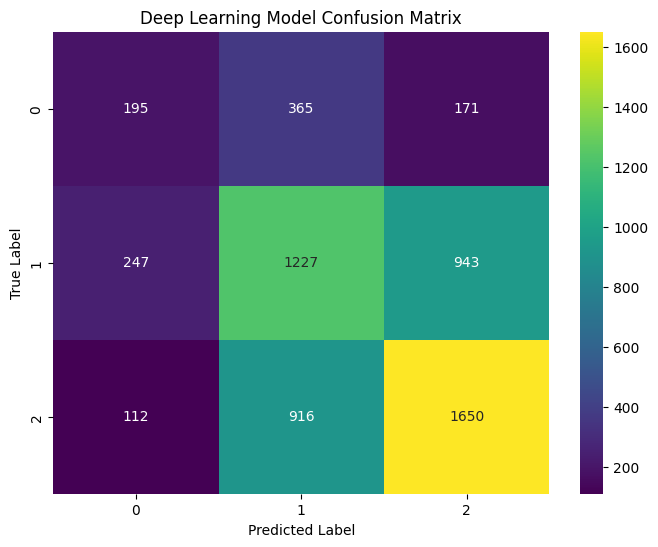

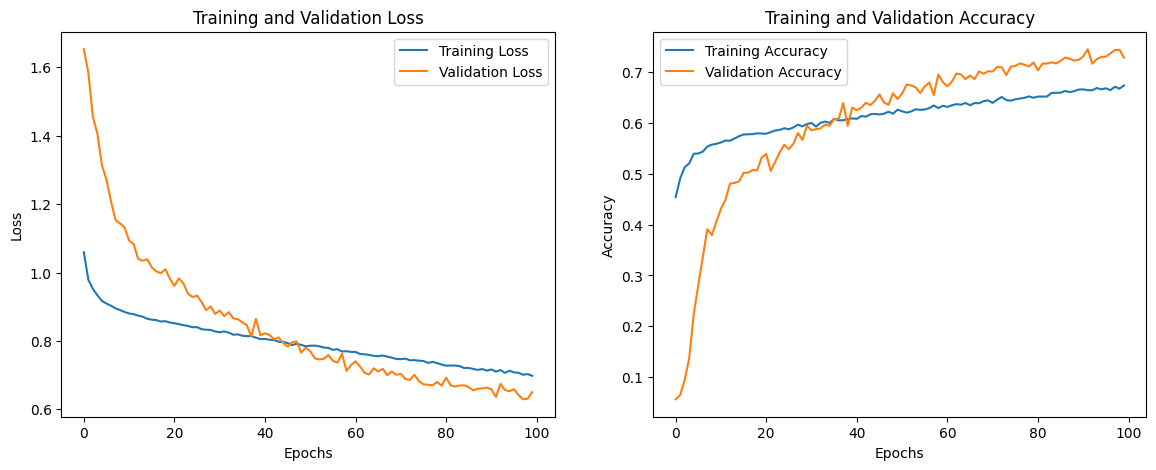

In [45]:
# Step 9: Define the Deep Learning Model with Early Stopping
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # Output layer for 3 classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

# Step 10: Evaluate the Model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report and confusion matrix
print("\nDeep Learning Model Performance:")
print(f"Accuracy: {model.evaluate(X_test, y_test, verbose=0)[1]}")
print(classification_report(y_test, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')
plt.title("Deep Learning Model Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot Training & Validation Loss and Accuracy
plt.figure(figsize=(14, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [47]:
model.summary

<bound method Model.summary of <Sequential name=sequential_1, built=True>>

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Function to check if a column contains multiple labels
def is_multi_label(column):
    return column.astype(str).str.contains(';').any()

# Identify multi-label columns
multi_label_columns = [col for col in data_cleaned.columns if is_multi_label(data_cleaned[col])]

# Initialize dictionaries to store tokenizers, max lengths, and vocabulary sizes
tokenizers = {}
max_len = {}
vocab_sizes = {}

# Tokenize multi-label columns
for col in multi_label_columns:
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(data_cleaned[col].fillna("").str.split(";"))  # Fit tokenizer on unique labels split by ";"
    tokenizers[col] = tokenizer
    vocab_sizes[col] = len(tokenizer.word_index) + 1  # Vocabulary size for embedding layer

    # Convert text to sequences
    data_cleaned[col + '_seq'] = data_cleaned[col].fillna("").apply(lambda x: tokenizer.texts_to_sequences([x.split(";")])[0])

    # Pad sequences
    max_len[col] = max(data_cleaned[col + '_seq'].apply(len))  # Maximum sequence length for this column
    data_cleaned[col + '_seq'] = list(pad_sequences(data_cleaned[col + '_seq'], maxlen=max_len[col], padding='post'))

# Display tokenization summary
multi_label_summary = {
    "Column": multi_label_columns,
    "Vocab Size": [vocab_sizes[col] for col in multi_label_columns],
    "Max Length": [max_len[col] for col in multi_label_columns]
}
multi_label_summary_df = pd.DataFrame(multi_label_summary)
print(multi_label_summary_df)


C:\Users\msn\AppData\Local\Temp\ipykernel_8776\3434585985.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col + '_seq'] = data_cleaned[col].fillna("").apply(lambda x: tokenizer.texts_to_sequences([x.split(";")])[0])
C:\Users\msn\AppData\Local\Temp\ipykernel_8776\3434585985.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col + '_seq'] = list(pad_sequences(data_cleaned[col + '_seq'], maxlen=max_len[col], padding='post'))
C:\Users\msn\AppData\Local\Temp\ipykernel_8776\343458

                            Column  Vocab Size  Max Length
0                       Employment           9           8
1                 CodingActivities          10           7
2                        LearnCode          11           9
3                  LearnCodeOnline          19          17
4                          TechDoc           9           7
5                       BuyNewTool          10           8
6                      TechEndorse          11           9
7           LanguageHaveWorkedWith          51          49
8           LanguageWantToWorkWith          51          49
9                  LanguageAdmired          51          49
10          DatabaseHaveWorkedWith          37          35
11          DatabaseWantToWorkWith          37          35
12                 DatabaseAdmired          37          35
13          PlatformHaveWorkedWith          29          27
14          PlatformWantToWorkWith          29          27
15                 PlatformAdmired          29          

C:\Users\msn\AppData\Local\Temp\ipykernel_8776\3434585985.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col + '_seq'] = data_cleaned[col].fillna("").apply(lambda x: tokenizer.texts_to_sequences([x.split(";")])[0])
C:\Users\msn\AppData\Local\Temp\ipykernel_8776\3434585985.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col + '_seq'] = list(pad_sequences(data_cleaned[col + '_seq'], maxlen=max_len[col], padding='post'))


In [7]:
from sklearn.preprocessing import LabelEncoder

# Step 4: Encode Non-Multi-Label Categorical Columns

# Identify non-multi-label columns excluding the target column `JobSat`
non_multi_label_columns = [col for col in data_cleaned.columns if col not in multi_label_columns + ['JobSat']]
categorical_columns = [col for col in non_multi_label_columns if data_cleaned[col].dtype == 'object']

# Apply Label Encoding to non-multi-label categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col].astype(str))
    label_encoders[col] = le  # Store the encoder for future use

# Summary of Label Encoded columns
encoded_summary = {
    "Column": categorical_columns,
    "Unique Classes": [len(label_encoders[col].classes_) for col in categorical_columns]
}

encoded_summary_df = pd.DataFrame(encoded_summary)
import ace_tools as tools; tools.display_dataframe_to_user(name="Non-Multi-Label Column Encoding Summary", dataframe=encoded_summary_df)


C:\Users\msn\AppData\Local\Temp\ipykernel_8776\184249023.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = le.fit_transform(data_cleaned[col].astype(str))
C:\Users\msn\AppData\Local\Temp\ipykernel_8776\184249023.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = le.fit_transform(data_cleaned[col].astype(str))
C:\Users\msn\AppData\Local\Temp\ipykernel_8776\184249023.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


ModuleNotFoundError: No module named 'ace_tools'

In [4]:

# Calculate the number and percentage of missing values for each column
missing_info = pd.DataFrame({
    'Missing Count': data.isnull().sum(),
    'Missing Percentage': data.isnull().mean() * 100
})

# Filter to display only columns with missing values
missing_info = missing_info[missing_info['Missing Count'] > 0]

# Sort by highest percentage of missing values
missing_info = missing_info.sort_values(by='Missing Percentage', ascending=False)

# Display the missing information
print(missing_info)

                            Missing Count  Missing Percentage
AINextMuch less integrated          64289           98.245641
AINextLess integrated               63082           96.401119
AINextNo change                     52939           80.900714
AINextMuch more integrated          51999           79.464217
EmbeddedAdmired                     48704           74.428840
...                                   ...                 ...
YearsCode                            5568            8.508948
NEWSOSites                           5151            7.871693
LearnCode                            4949            7.563000
EdLevel                              4653            7.110656
AISelect                             4530            6.922689

[109 rows x 2 columns]


In [5]:
# Calculate the number and percentage of missing values for each column
missing_info = pd.DataFrame({
    'Missing Count': data.isnull().sum(),
    'Missing Percentage': data.isnull().mean() * 100
})

# Filter to display only columns with missing values
missing_info = missing_info[missing_info['Missing Count'] > 0]

# Sort by highest percentage of missing values
missing_info = missing_info.sort_values(by='Missing Percentage', ascending=False)

# Display the missing information for JobSat
if 'JobSat' in missing_info.index:
    print("Missing percentage for 'JobSat':")
    print(missing_info.loc['JobSat'])
else:
    print("No missing values for 'JobSat'.")


Missing percentage for 'JobSat':
Missing Count         36311.000000
Missing Percentage       55.490013
Name: JobSat, dtype: float64


In [6]:
print('JobSat' in data.columns)  # Should return True if JobSat is present
print(data.columns)  # View all columns to verify


True
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


In [7]:
data.shape

(65437, 114)

In [8]:
print(data.isnull().mean() * 100)  # Check missing values by percentage
print(data.columns)  # Confirm columns present before dropna step


ResponseId              0.000000
MainBranch              0.000000
Age                     0.000000
Employment              0.000000
RemoteWork             16.246160
                         ...    
JobSatPoints_11        55.002522
SurveyLength           14.143375
SurveyEase             14.057796
ConvertedCompYearly    64.186928
JobSat                 55.490013
Length: 114, dtype: float64
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


In [9]:
data = data.dropna(thresh=len(data) * 0.3, axis=1)
print('JobSat' in data.columns)  # Should be True if JobSat was retained
print(data.columns)  # Confirm columns present after dropna step


True
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=108)


In [10]:
data.shape

(65437, 108)

In [11]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder


# 1.2: Remove rows with missing 'JobSat' (target variable) to avoid bias
data = data.dropna(subset=['JobSat'])


In [12]:
data.JobSat

10        8.0
12        8.0
15        5.0
18       10.0
20        6.0
         ... 
65178     8.0
65241     5.0
65265     8.0
65351     8.0
65412     8.0
Name: JobSat, Length: 29126, dtype: float64

In [13]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, Dropout
# from tensorflow.keras.models import Model
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from sklearn.model_selection import train_test_split

# # Sample DataFrame setup (Assuming `data` is pre-loaded DataFrame)
# # Step 1: Reclassify 'JobSat' before splitting
# def reclassify_jobsat(value):
#     if value <= 4:
#         return 0  # Low satisfaction
#     elif 5 <= value <= 7:
#         return 1  # Medium satisfaction
#     else:
#         return 2  # High satisfaction

# data['JobSat'] = data['JobSat'].apply(reclassify_jobsat)

# # Step 2: Split data into training and test sets
# train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['JobSat'])

# # Step 3: Identify Multi-Label and Non-Multi-Label Columns in the training set
# def is_multi_label(column):
#     return column.astype(str).str.contains(';').any()

# multi_label_columns = [col for col in train_data.columns if is_multi_label(train_data[col])]
# non_multi_label_columns = [col for col in train_data.columns if col not in multi_label_columns + ['JobSat']]

# # Step 4: Tokenization and Sequence Padding for Multi-Label Columns
# tokenizers = {}
# max_len = {}
# vocab_sizes = {}

# for col in multi_label_columns:
#     tokenizer = Tokenizer()
#     tokenizer.fit_on_texts(train_data[col].fillna("").str.split(";"))
#     tokenizers[col] = tokenizer
#     vocab_sizes[col] = len(tokenizer.word_index) + 1

#     # Transform both training and test data
#     train_data[col + '_seq'] = train_data[col].fillna("").apply(lambda x: tokenizer.texts_to_sequences([x.split(";")])[0])
#     test_data[col + '_seq'] = test_data[col].fillna("").apply(lambda x: tokenizer.texts_to_sequences([x.split(";")])[0])
    
#     max_len[col] = max(train_data[col + '_seq'].apply(len).max(), test_data[col + '_seq'].apply(len).max())
#     train_data[col + '_seq'] = list(pad_sequences(train_data[col + '_seq'], maxlen=max_len[col], padding='post'))
#     test_data[col + '_seq'] = list(pad_sequences(test_data[col + '_seq'], maxlen=max_len[col], padding='post'))

# # Step 5: Label Encoding for Non-Multi-Label Categorical Columns
# for col in non_multi_label_columns:
#     if train_data[col].dtype == 'object':
#         le = LabelEncoder()
#         train_data[col] = le.fit_transform(train_data[col].astype(str))
#         label_map = {label: idx for idx, label in enumerate(le.classes_)}
#         test_data[col] = test_data[col].map(label_map).fillna(-1).astype(int)

# # Step 6: Prepare Data for Model Input
# X_train_multi_label = [np.array(list(train_data[col + '_seq']), dtype=np.int32) for col in multi_label_columns]
# X_test_multi_label = [np.array(list(test_data[col + '_seq']), dtype=np.int32) for col in multi_label_columns]

# # Step 7: Prepare Non-Multi-Label Input
# X_train_non_multi_label = np.array(train_data[non_multi_label_columns].values, dtype=np.float32)
# X_test_non_multi_label = np.array(test_data[non_multi_label_columns].values, dtype=np.float32)
# y_train = np.array(train_data['JobSat'].values, dtype=np.int32)
# y_test = np.array(test_data['JobSat'].values, dtype=np.int32)

# # Step 8: Define the Model
# input_layers = []
# embedding_layers = []

# # Embedding layers for multi-label columns
# for col in multi_label_columns:
#     max_len_col = max_len[col]
#     vocab_size = vocab_sizes[col]

#     input_layer = Input(shape=(max_len_col,), name=f"{col}_input", dtype='int32')
#     embedding_layer = Embedding(input_dim=vocab_size, output_dim=8)(input_layer)
#     flatten_layer = Flatten()(embedding_layer)

#     input_layers.append(input_layer)
#     embedding_layers.append(flatten_layer)

# # Input for non-multi-label features
# non_multi_label_input = Input(shape=(X_train_non_multi_label.shape[1],), name="non_multi_label_input")
# input_layers.append(non_multi_label_input)
# embedding_layers.append(non_multi_label_input)

# # Combine all embeddings and add dense layers with Dropout
# concat_layer = Concatenate()(embedding_layers)
# dense_layer = Dense(64, activation='relu')(concat_layer)
# dropout_layer = Dropout(0.5)(dense_layer)
# output_layer = Dense(3, activation='softmax')(dropout_layer)

# # Compile model
# model = Model(inputs=input_layers, outputs=output_layer)
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Step 9: Early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# # Stack the data to form the final inputs for model training
# X_train = X_train_multi_label + [X_train_non_multi_label]
# X_test = X_test_multi_label + [X_test_non_multi_label]

# # Debugging print statements to ensure correct shapes
# print(f"[DEBUG] Shape of y_train: {y_train.shape}")
# print(f"[DEBUG] Shape of y_test: {y_test.shape}")
# for i, input_tensor in enumerate(X_train):
#     print(f"[DEBUG] Shape of X_train input {i}: {input_tensor.shape}")
# for i, input_tensor in enumerate(X_test):
#     print(f"[DEBUG] Shape of X_test input {i}: {input_tensor.shape}")

# # Model Training
# history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# # Evaluation
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print(f"Test Loss: {test_loss}")
# print(f"Test Accuracy: {test_accuracy}")


In [14]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, Dropout
# from tensorflow.keras.models import Model
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from sklearn.model_selection import train_test_split

# # Sample DataFrame setup (Assuming `data` is pre-loaded DataFrame)
# # Step 1: Reclassify 'JobSat' before splitting
# def reclassify_jobsat(value):
#     if value <= 4:
#         return 0  # Low satisfaction
#     elif 5 <= value <= 7:
#         return 1  # Medium satisfaction
#     else:
#         return 2  # High satisfaction

# data['JobSat'] = data['JobSat'].apply(reclassify_jobsat)

# # Step 2: Split data into training and test sets
# train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['JobSat'])

# # Step 3: Identify Multi-Label and Non-Multi-Label Columns in the training set
# def is_multi_label(column):
#     return column.astype(str).str.contains(';').any()

# multi_label_columns = [col for col in train_data.columns if is_multi_label(train_data[col])]
# non_multi_label_columns = [col for col in train_data.columns if col not in multi_label_columns + ['JobSat']]

# # Step 4: Tokenization and Sequence Padding for Multi-Label Columns
# tokenizers = {}
# max_len = {}
# vocab_sizes = {}

# for col in multi_label_columns:
#     tokenizer = Tokenizer()
#     tokenizer.fit_on_texts(train_data[col].fillna("").str.split(";"))
#     tokenizers[col] = tokenizer
#     vocab_sizes[col] = len(tokenizer.word_index) + 1

#     # Transform both training and test data
#     train_data[col + '_seq'] = train_data[col].fillna("").apply(lambda x: tokenizer.texts_to_sequences([x.split(";")])[0])
#     test_data[col + '_seq'] = test_data[col].fillna("").apply(lambda x: tokenizer.texts_to_sequences([x.split(";")])[0])
    
#     max_len[col] = max(train_data[col + '_seq'].apply(len).max(), test_data[col + '_seq'].apply(len).max())
#     train_data[col + '_seq'] = list(pad_sequences(train_data[col + '_seq'], maxlen=max_len[col], padding='post'))
#     test_data[col + '_seq'] = list(pad_sequences(test_data[col + '_seq'], maxlen=max_len[col], padding='post'))

# # Step 5: Label Encoding for Non-Multi-Label Categorical Columns
# for col in non_multi_label_columns:
#     if train_data[col].dtype == 'object':
#         le = LabelEncoder()
#         train_data[col] = le.fit_transform(train_data[col].astype(str))
#         label_map = {label: idx for idx, label in enumerate(le.classes_)}
#         test_data[col] = test_data[col].map(label_map).fillna(-1).astype(int)

# # Step 6: Prepare Data for Model Input
# X_train_multi_label = [np.array(list(train_data[col + '_seq']), dtype=np.int32) for col in multi_label_columns]
# X_test_multi_label = [np.array(list(test_data[col + '_seq']), dtype=np.int32) for col in multi_label_columns]

# # Step 7: Prepare Non-Multi-Label Input
# X_train_non_multi_label = np.array(train_data[non_multi_label_columns].values, dtype=np.float32)
# X_test_non_multi_label = np.array(test_data[non_multi_label_columns].values, dtype=np.float32)
# y_train = np.array(train_data['JobSat'].values, dtype=np.int32)
# y_test = np.array(test_data['JobSat'].values, dtype=np.int32)

# # Step 8: Define the Model
# input_layers = []
# embedding_layers = []

# # Embedding layers for multi-label columns
# for col in multi_label_columns:
#     max_len_col = max_len[col]
#     vocab_size = vocab_sizes[col]

#     input_layer = Input(shape=(max_len_col,), name=f"{col}_input", dtype='int32')
#     embedding_layer = Embedding(input_dim=vocab_size, output_dim=8)(input_layer)
#     flatten_layer = Flatten()(embedding_layer)

#     input_layers.append(input_layer)
#     embedding_layers.append(flatten_layer)

# # Input for non-multi-label features
# non_multi_label_input = Input(shape=(X_train_non_multi_label.shape[1],), name="non_multi_label_input")
# input_layers.append(non_multi_label_input)
# embedding_layers.append(non_multi_label_input)

# # Combine all embeddings and add dense layers with Dropout
# concat_layer = Concatenate()(embedding_layers)
# dense_layer = Dense(64, activation='relu')(concat_layer)
# dropout_layer = Dropout(0.5)(dense_layer)
# output_layer = Dense(3, activation='softmax')(dropout_layer)

# # Compile model
# model = Model(inputs=input_layers, outputs=output_layer)
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Step 9: Early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# # Stack the data to form the final inputs for model training
# X_train = X_train_multi_label + [X_train_non_multi_label]
# X_test = X_test_multi_label + [X_test_non_multi_label]

# # Debugging print statements to ensure correct shapes
# print(f"[DEBUG] Shape of y_train: {y_train.shape}")
# print(f"[DEBUG] Shape of y_test: {y_test.shape}")
# for i, input_tensor in enumerate(X_train):
#     print(f"[DEBUG] Shape of X_train input {i}: {input_tensor.shape}")
# for i, input_tensor in enumerate(X_test):
#     print(f"[DEBUG] Shape of X_test input {i}: {input_tensor.shape}")

# # Model Training
# history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# # Evaluation
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print(f"Test Loss: {test_loss}")
# print(f"Test Accuracy: {test_accuracy}")


In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# Step 1: Data Preparation
def reclassify_jobsat(value):
    if value <= 4:
        return 0  # Low satisfaction
    elif 5 <= value <= 7:
        return 1  # Medium satisfaction
    else:
        return 2  # High satisfaction

data['JobSat'] = data['JobSat'].apply(reclassify_jobsat)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['JobSat'])

# Step 2: Multi-label and non-multi-label column identification
def is_multi_label(column):
    return column.astype(str).str.contains(';').any()

multi_label_columns = [col for col in train_data.columns if is_multi_label(train_data[col])]
non_multi_label_columns = [col for col in train_data.columns if col not in multi_label_columns + ['JobSat']]

# Step 3: Tokenization for multi-label columns
tokenizers = {}
max_len = {}
vocab_sizes = {}

for col in multi_label_columns:
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_data[col].fillna("").str.split(";"))
    tokenizers[col] = tokenizer
    vocab_sizes[col] = len(tokenizer.word_index) + 1

    train_data[col + '_seq'] = train_data[col].fillna("").apply(lambda x: tokenizer.texts_to_sequences([x.split(";")])[0])
    test_data[col + '_seq'] = test_data[col].fillna("").apply(lambda x: tokenizer.texts_to_sequences([x.split(";")])[0])

    max_len[col] = max(train_data[col + '_seq'].apply(len).max(), test_data[col + '_seq'].apply(len).max())
    train_data[col + '_seq'] = list(pad_sequences(train_data[col + '_seq'], maxlen=max_len[col], padding='post'))
    test_data[col + '_seq'] = list(pad_sequences(test_data[col + '_seq'], maxlen=max_len[col], padding='post'))

# Step 4: Label encoding for non-multi-label categorical columns
for col in non_multi_label_columns:
    if train_data[col].dtype == 'object':
        le = LabelEncoder()
        train_data[col] = le.fit_transform(train_data[col].astype(str))
        label_map = {label: idx for idx, label in enumerate(le.classes_)}
        test_data[col] = test_data[col].map(label_map).fillna(-1).astype(int)

# Step 5: Standardizing numeric columns
numeric_columns = train_data[non_multi_label_columns].select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
train_data[numeric_columns] = scaler.fit_transform(train_data[numeric_columns])
test_data[numeric_columns] = scaler.transform(test_data[numeric_columns])

# Step 6: Model inputs and target
X_train_multi_label = [np.array(list(train_data[col + '_seq']), dtype=np.int32) for col in multi_label_columns]
X_test_multi_label = [np.array(list(test_data[col + '_seq']), dtype=np.int32) for col in multi_label_columns]
X_train_non_multi_label = np.array(train_data[non_multi_label_columns].values, dtype=np.float32)
X_test_non_multi_label = np.array(test_data[non_multi_label_columns].values, dtype=np.float32)
y_train = np.array(train_data['JobSat'].values, dtype=np.int32)
y_test = np.array(test_data['JobSat'].values, dtype=np.int32)

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Step 7: Model Building
def build_model():
    input_layers = []
    embedding_layers = []

    for col in multi_label_columns:
        max_len_col = max_len[col]
        vocab_size = vocab_sizes[col]

        input_layer = Input(shape=(max_len_col,), name=f"{col}_input", dtype='int32')
        embedding_layer = Embedding(input_dim=vocab_size, output_dim=8)(input_layer)
        flatten_layer = Flatten()(embedding_layer)

        input_layers.append(input_layer)
        embedding_layers.append(flatten_layer)

    non_multi_label_input = Input(shape=(X_train_non_multi_label.shape[1],), name="non_multi_label_input")
    input_layers.append(non_multi_label_input)
    embedding_layers.append(non_multi_label_input)

    concat_layer = Concatenate()(embedding_layers)
    dense_layer = Dense(64, activation='relu')(concat_layer)
    dropout_layer = Dropout(0.2)(dense_layer)
    output_layer = Dense(3, activation='softmax')(dropout_layer)

    model = Model(inputs=input_layers, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 8: Training with Early Stopping
model = build_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

X_train = X_train_multi_label + [X_train_non_multi_label]
X_test = X_test_multi_label + [X_test_non_multi_label]

history = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    batch_size=64, 
    validation_data=(X_test, y_test), 
    class_weight=class_weights_dict, 
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


C:\Users\msn\AppData\Local\Temp\ipykernel_412\2782650117.py:68: RuntimeWarning: overflow encountered in cast
  X_test_non_multi_label = np.array(test_data[non_multi_label_columns].values, dtype=np.float32)


Epoch 1/100


d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['Employment_input', 'CodingActivities_input', 'LearnCode_input', 'LearnCodeOnline_input', 'TechDoc_input', 'BuyNewTool_input', 'TechEndorse_input', 'LanguageHaveWorkedWith_input', 'LanguageWantToWorkWith_input', 'LanguageAdmired_input', 'DatabaseHaveWorkedWith_input', 'DatabaseWantToWorkWith_input', 'DatabaseAdmired_input', 'PlatformHaveWorkedWith_input', 'PlatformWantToWorkWith_input', 'PlatformAdmired_input', 'WebframeHaveWorkedWith_input', 'WebframeWantToWorkWith_input', 'WebframeAdmired_input', 'EmbeddedHaveWorkedWith_input', 'MiscTechHaveWorkedWith_input', 'MiscTechWantToWorkWith_input', 'MiscTechAdmired_input', 'ToolsTechHaveWorkedWith_input', 'ToolsTechWantToWorkWith_input', 'ToolsTechAdmired_input', 'NEWCollabToolsHaveWorkedWith_input', 'NEWCollabToolsWantToWorkWith_input', 'NEWCollabToolsAdm

365/365 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.3206 - loss: 1.1026 - val_accuracy: 0.4597 - val_loss: 1.0986
Epoch 2/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4588 - loss: 1.0923 - val_accuracy: 0.4149 - val_loss: 1.0986
Epoch 3/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4297 - loss: 1.0968 - val_accuracy: 0.4149 - val_loss: 1.0986
Epoch 4/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4200 - loss: 1.0979 - val_accuracy: 0.4149 - val_loss: 1.0986
Epoch 5/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4188 - loss: 1.0877 - val_accuracy: 0.4149 - val_loss: 1.0986
Epoch 6/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3670 - loss: 1.1006 - val_accuracy: 0.4149 - val_loss: 1.0986
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4104 - loss: 1.0986
Test Loss: 1.0985792875289917
Test Accuracy: 0.4148643910884857


In [571]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# Data Preparation
def reclassify_jobsat(value):
    if value <= 4:
        return 0  # Low satisfaction
    elif 5 <= value <= 7:
        return 1  # Medium satisfaction
    else:
        return 2  # High satisfaction

data['JobSat'] = data['JobSat'].apply(reclassify_jobsat)

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['JobSat'])

# Function to check for multi-label columns
def is_multi_label(column):
    return column.astype(str).str.contains(';').any()

# Identify multi-label and non-multi-label columns
multi_label_columns = [col for col in train_data.columns if is_multi_label(train_data[col])]
non_multi_label_columns = [col for col in train_data.columns if col not in multi_label_columns + ['JobSat']]

# Tokenization for multi-label columns
tokenizers = {}
max_len = {}
vocab_sizes = {}

for col in multi_label_columns:
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_data[col].fillna("").str.split(";"))
    tokenizers[col] = tokenizer
    vocab_sizes[col] = len(tokenizer.word_index) + 1

    train_data[col + '_seq'] = train_data[col].fillna("").apply(lambda x: tokenizer.texts_to_sequences([x.split(";")])[0])
    test_data[col + '_seq'] = test_data[col].fillna("").apply(lambda x: tokenizer.texts_to_sequences([x.split(";")])[0])

    max_len[col] = max(train_data[col + '_seq'].apply(len).max(), test_data[col + '_seq'].apply(len).max())
    train_data[col + '_seq'] = list(pad_sequences(train_data[col + '_seq'], maxlen=max_len[col], padding='post'))
    test_data[col + '_seq'] = list(pad_sequences(test_data[col + '_seq'], maxlen=max_len[col], padding='post'))

# Encode non-multi-label categorical columns
for col in non_multi_label_columns:
    if train_data[col].dtype == 'object':
        le = LabelEncoder()
        train_data[col] = le.fit_transform(train_data[col].astype(str))
        label_map = {label: idx for idx, label in enumerate(le.classes_)}
        test_data[col] = test_data[col].map(label_map).fillna(-1).astype(int)

# Standardize numeric columns
numeric_columns = train_data[non_multi_label_columns].select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
train_data[numeric_columns] = scaler.fit_transform(train_data[numeric_columns])
test_data[numeric_columns] = scaler.transform(test_data[numeric_columns])

# Prepare model inputs
X_train_multi_label = [np.array(list(train_data[col + '_seq']), dtype=np.int32) for col in multi_label_columns]
X_test_multi_label = [np.array(list(test_data[col + '_seq']), dtype=np.int32) for col in multi_label_columns]
X_train_non_multi_label = np.array(train_data[non_multi_label_columns].values, dtype=np.float32)
X_test_non_multi_label = np.array(test_data[non_multi_label_columns].values, dtype=np.float32)
y_train = np.array(train_data['JobSat'].values, dtype=np.int32)
y_test = np.array(test_data['JobSat'].values, dtype=np.int32)

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weights_dict)

# Model building function (omitting hyperparameter tuning for simplicity)
def build_model():
    input_layers = []
    embedding_layers = []

    for col in multi_label_columns:
        max_len_col = max_len[col]
        vocab_size = vocab_sizes[col]

        input_layer = Input(shape=(max_len_col,), name=f"{col}_input", dtype='int32')
        embedding_layer = Embedding(input_dim=vocab_size, output_dim=16)(input_layer)
        flatten_layer = Flatten()(embedding_layer)

        input_layers.append(input_layer)
        embedding_layers.append(flatten_layer)

    non_multi_label_input = Input(shape=(X_train_non_multi_label.shape[1],), name="non_multi_label_input")
    input_layers.append(non_multi_label_input)
    embedding_layers.append(non_multi_label_input)

    concat_layer = Concatenate()(embedding_layers)
    concat_layer = Dropout(0.3)(concat_layer)
    dense_layer = Dense(64, activation='relu')(concat_layer)
    dropout_layer = Dropout(0.3)(dense_layer)
    output_layer = Dense(3, activation='softmax')(dropout_layer)

    model = Model(inputs=input_layers, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Training the model with class weights
model = build_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

X_train = X_train_multi_label + [X_train_non_multi_label]
X_test = X_test_multi_label + [X_test_non_multi_label]

history = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    batch_size=32, 
    validation_data=(X_test, y_test), 
    class_weight=class_weights_dict, 
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the best model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


C:\Users\msn\AppData\Local\Temp\ipykernel_16072\2885181397.py:70: RuntimeWarning: overflow encountered in cast
  X_test_non_multi_label = np.array(test_data[non_multi_label_columns].values, dtype=np.float32)


Class Weights: {0: 2.6570874672140494, 1: 0.8032543868721344, 2: 0.7253144066741377}
Epoch 1/100


d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['Employment_input', 'CodingActivities_input', 'LearnCode_input', 'LearnCodeOnline_input', 'TechDoc_input', 'BuyNewTool_input', 'TechEndorse_input', 'LanguageHaveWorkedWith_input', 'LanguageWantToWorkWith_input', 'LanguageAdmired_input', 'DatabaseHaveWorkedWith_input', 'DatabaseWantToWorkWith_input', 'DatabaseAdmired_input', 'PlatformHaveWorkedWith_input', 'PlatformWantToWorkWith_input', 'PlatformAdmired_input', 'WebframeHaveWorkedWith_input', 'WebframeWantToWorkWith_input', 'WebframeAdmired_input', 'EmbeddedHaveWorkedWith_input', 'MiscTechHaveWorkedWith_input', 'MiscTechWantToWorkWith_input', 'MiscTechAdmired_input', 'ToolsTechHaveWorkedWith_input', 'ToolsTechWantToWorkWith_input', 'ToolsTechAdmired_input', 'NEWCollabToolsHaveWorkedWith_input', 'NEWCollabToolsWantToWorkWith_input', 'NEWCollabToolsAdm

729/729 ━━━━━━━━━━━━━━━━━━━━ 45s 46ms/step - accuracy: 0.2350 - loss: 1.1046 - val_accuracy: 0.4149 - val_loss: 1.0984
Epoch 2/100
729/729 ━━━━━━━━━━━━━━━━━━━━ 32s 44ms/step - accuracy: 0.4402 - loss: 1.0972 - val_accuracy: 0.4597 - val_loss: 1.0983
Epoch 3/100
729/729 ━━━━━━━━━━━━━━━━━━━━ 32s 44ms/step - accuracy: 0.4062 - loss: 1.0958 - val_accuracy: 0.4149 - val_loss: 1.0985
Epoch 4/100
729/729 ━━━━━━━━━━━━━━━━━━━━ 32s 43ms/step - accuracy: 0.2442 - loss: 1.1063 - val_accuracy: 0.4149 - val_loss: 1.0983
Epoch 5/100
729/729 ━━━━━━━━━━━━━━━━━━━━ 32s 43ms/step - accuracy: 0.3852 - loss: 1.1068 - val_accuracy: 0.4149 - val_loss: 1.0983
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4592 - loss: 1.0983
Test Loss: 1.0983136892318726
Test Accuracy: 0.4596635699272156


In [541]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import random

# Step 1: Data Preparation
def reclassify_jobsat(value):
    if value <= 4:
        return 0  # Low satisfaction
    elif 5 <= value <= 7:
        return 1  # Medium satisfaction
    else:
        return 2  # High satisfaction

data['JobSat'] = data['JobSat'].apply(reclassify_jobsat)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['JobSat'])

def is_multi_label(column):
    return column.astype(str).str.contains(';').any()

multi_label_columns = [col for col in train_data.columns if is_multi_label(train_data[col])]
non_multi_label_columns = [col for col in train_data.columns if col not in multi_label_columns + ['JobSat']]

# Tokenization for multi-label columns
tokenizers = {}
max_len = {}
vocab_sizes = {}

for col in multi_label_columns:
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_data[col].fillna("").str.split(";"))
    tokenizers[col] = tokenizer
    vocab_sizes[col] = len(tokenizer.word_index) + 1

    train_data[col + '_seq'] = train_data[col].fillna("").apply(lambda x: tokenizer.texts_to_sequences([x.split(";")])[0])
    test_data[col + '_seq'] = test_data[col].fillna("").apply(lambda x: tokenizer.texts_to_sequences([x.split(";")])[0])

    max_len[col] = max(train_data[col + '_seq'].apply(len).max(), test_data[col + '_seq'].apply(len).max())
    train_data[col + '_seq'] = list(pad_sequences(train_data[col + '_seq'], maxlen=max_len[col], padding='post'))
    test_data[col + '_seq'] = list(pad_sequences(test_data[col + '_seq'], maxlen=max_len[col], padding='post'))

# Label encoding for non-multi-label categorical columns
for col in non_multi_label_columns:
    if train_data[col].dtype == 'object':
        le = LabelEncoder()
        train_data[col] = le.fit_transform(train_data[col].astype(str))
        label_map = {label: idx for idx, label in enumerate(le.classes_)}
        test_data[col] = test_data[col].map(label_map).fillna(-1).astype(int)

# Prepare model inputs
X_train_multi_label = [np.array(list(train_data[col + '_seq']), dtype=np.int32) for col in multi_label_columns]
X_test_multi_label = [np.array(list(test_data[col + '_seq']), dtype=np.int32) for col in multi_label_columns]
X_train_non_multi_label = np.array(train_data[non_multi_label_columns].values, dtype=np.float32)
X_test_non_multi_label = np.array(test_data[non_multi_label_columns].values, dtype=np.float32)
y_train = np.array(train_data['JobSat'].values, dtype=np.int32)
y_test = np.array(test_data['JobSat'].values, dtype=np.int32)

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weights_dict)

# Define model builder function with random search for hyperparameters
def build_model(embedding_dim, dense_units, dropout_rate, learning_rate):
    input_layers = []
    embedding_layers = []

    for col in multi_label_columns:
        max_len_col = max_len[col]
        vocab_size = vocab_sizes[col]

        input_layer = Input(shape=(max_len_col,), name=f"{col}_input", dtype='int32')
        embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(input_layer)
        flatten_layer = Flatten()(embedding_layer)

        input_layers.append(input_layer)
        embedding_layers.append(flatten_layer)

    non_multi_label_input = Input(shape=(X_train_non_multi_label.shape[1],), name="non_multi_label_input")
    input_layers.append(non_multi_label_input)
    embedding_layers.append(non_multi_label_input)

    concat_layer = Concatenate()(embedding_layers)
    dense_layer = Dense(dense_units, activation='relu')(concat_layer)
    dropout_layer = Dropout(dropout_rate)(dense_layer)
    output_layer = Dense(3, activation='softmax')(dropout_layer)

    model = Model(inputs=input_layers, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Random search for hyperparameters
best_val_accuracy = 0
best_model = None
best_params = {}

embedding_dim_options = [8, 16, 24, 32]
dense_units_options = [64, 128, 256]
dropout_rate_options = [0.2, 0.3, 0.4]
learning_rate_options = [1e-3, 5e-4, 1e-4]

for _ in range(10):  # 10 random configurations
    embedding_dim = random.choice(embedding_dim_options)
    dense_units = random.choice(dense_units_options)
    dropout_rate = random.choice(dropout_rate_options)
    learning_rate = random.choice(learning_rate_options)

    model = build_model(embedding_dim, dense_units, dropout_rate, learning_rate)
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    X_train = X_train_multi_label + [X_train_non_multi_label]
    X_test = X_test_multi_label + [X_test_non_multi_label]

    history = model.fit(
        X_train, 
        y_train, 
        epochs=30,  # Increased epochs
        batch_size=32, 
        validation_data=(X_test, y_test), 
        class_weight=class_weights_dict, 
        callbacks=[early_stopping],
        verbose=1
    )

    val_accuracy = max(history.history['val_accuracy'])
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_model = model
        best_params = {
            'embedding_dim': embedding_dim,
            'dense_units': dense_units,
            'dropout_rate': dropout_rate,
            'learning_rate': learning_rate
        }

# Display best hyperparameters
print("Best Hyperparameters:", best_params)
print("Best Validation Accuracy:", best_val_accuracy)

# Evaluate the best model on test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Best Model Test Loss: {test_loss}")
print(f"Best Model Test Accuracy: {test_accuracy}")


C:\Users\msn\AppData\Local\Temp\ipykernel_16072\2542525424.py:61: RuntimeWarning: overflow encountered in cast
  X_train_non_multi_label = np.array(train_data[non_multi_label_columns].values, dtype=np.float32)
C:\Users\msn\AppData\Local\Temp\ipykernel_16072\2542525424.py:62: RuntimeWarning: overflow encountered in cast
  X_test_non_multi_label = np.array(test_data[non_multi_label_columns].values, dtype=np.float32)


Class Weights: {0: 1.0}
Epoch 1/30


d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['Employment_input', 'CodingActivities_input', 'LearnCode_input', 'LearnCodeOnline_input', 'TechDoc_input', 'BuyNewTool_input', 'TechEndorse_input', 'LanguageHaveWorkedWith_input', 'LanguageWantToWorkWith_input', 'LanguageAdmired_input', 'DatabaseHaveWorkedWith_input', 'DatabaseWantToWorkWith_input', 'DatabaseAdmired_input', 'PlatformHaveWorkedWith_input', 'PlatformWantToWorkWith_input', 'PlatformAdmired_input', 'WebframeHaveWorkedWith_input', 'WebframeWantToWorkWith_input', 'WebframeAdmired_input', 'EmbeddedHaveWorkedWith_input', 'MiscTechHaveWorkedWith_input', 'MiscTechWantToWorkWith_input', 'MiscTechAdmired_input', 'ToolsTechHaveWorkedWith_input', 'ToolsTechWantToWorkWith_input', 'ToolsTechAdmired_input', 'NEWCollabToolsHaveWorkedWith_input', 'NEWCollabToolsWantToWorkWith_input', 'NEWCollabToolsAdm

676/729 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9944 - loss: 23.8354

KeyboardInterrupt: 

In [395]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import keras_tuner as kt

# Data Preparation (assuming 'data' is pre-loaded as a DataFrame)
def reclassify_jobsat(value):
    if value <= 4:
        return 0  # Low satisfaction
    elif 5 <= value <= 7:
        return 1  # Medium satisfaction
    else:
        return 2  # High satisfaction

data['JobSat'] = data['JobSat'].apply(reclassify_jobsat)

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['JobSat'])

def is_multi_label(column):
    return column.astype(str).str.contains(';').any()

multi_label_columns = [col for col in train_data.columns if is_multi_label(train_data[col])]
non_multi_label_columns = [col for col in train_data.columns if col not in multi_label_columns + ['JobSat']]

# Tokenization for multi-label columns
tokenizers = {}
max_len = {}
vocab_sizes = {}

for col in multi_label_columns:
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_data[col].fillna("").str.split(";"))
    tokenizers[col] = tokenizer
    vocab_sizes[col] = len(tokenizer.word_index) + 1

    train_data[col + '_seq'] = train_data[col].fillna("").apply(lambda x: tokenizer.texts_to_sequences([x.split(";")])[0])
    test_data[col + '_seq'] = test_data[col].fillna("").apply(lambda x: tokenizer.texts_to_sequences([x.split(";")])[0])

    max_len[col] = max(train_data[col + '_seq'].apply(len).max(), test_data[col + '_seq'].apply(len).max())
    train_data[col + '_seq'] = list(pad_sequences(train_data[col + '_seq'], maxlen=max_len[col], padding='post'))
    test_data[col + '_seq'] = list(pad_sequences(test_data[col + '_seq'], maxlen=max_len[col], padding='post'))

# Label encoding for non-multi-label categorical columns
for col in non_multi_label_columns:
    if train_data[col].dtype == 'object':
        le = LabelEncoder()
        train_data[col] = le.fit_transform(train_data[col].astype(str))
        label_map = {label: idx for idx, label in enumerate(le.classes_)}
        test_data[col] = test_data[col].map(label_map).fillna(-1).astype(int)

# Prepare model inputs
X_train_multi_label = [np.array(list(train_data[col + '_seq']), dtype=np.int32) for col in multi_label_columns]
X_test_multi_label = [np.array(list(test_data[col + '_seq']), dtype=np.int32) for col in multi_label_columns]
X_train_non_multi_label = np.array(train_data[non_multi_label_columns].values, dtype=np.float32)
X_test_non_multi_label = np.array(test_data[non_multi_label_columns].values, dtype=np.float32)
y_train = np.array(train_data['JobSat'].values, dtype=np.int32)
y_test = np.array(test_data['JobSat'].values, dtype=np.int32)

# Define the hyperparameter tuning model
def build_model(hp):
    input_layers = []
    embedding_layers = []

    for col in multi_label_columns:
        max_len_col = max_len[col]
        vocab_size = vocab_sizes[col]

        input_layer = Input(shape=(max_len_col,), name=f"{col}_input", dtype='int32')
        embedding_dim = hp.Int('embedding_dim', min_value=8, max_value=32, step=8)
        embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(input_layer)
        flatten_layer = Flatten()(embedding_layer)

        input_layers.append(input_layer)
        embedding_layers.append(flatten_layer)

    non_multi_label_input = Input(shape=(X_train_non_multi_label.shape[1],), name="non_multi_label_input")
    input_layers.append(non_multi_label_input)
    embedding_layers.append(non_multi_label_input)

    concat_layer = Concatenate()(embedding_layers)
    dense_units = hp.Int('dense_units', min_value=32, max_value=128, step=32)
    dense_layer = Dense(dense_units, activation='relu')(concat_layer)
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.3, step=0.1)
    dropout_layer = Dropout(dropout_rate)(dense_layer)
    output_layer = Dense(3, activation='softmax')(dropout_layer)

    # Adjusted learning rate range
    learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-3, sampling='LOG')
    model = Model(inputs=input_layers, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Bayesian Optimization Tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    directory='hyperparam_tuning',
    project_name='job_satisfaction_optimized'
)

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

X_train = X_train_multi_label + [X_train_non_multi_label]
X_test = X_test_multi_label + [X_test_non_multi_label]

# Hyperparameter search
tuner.search(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Retrieve the best model after tuning
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Best Model Test Loss: {test_loss}")
print(f"Best Model Test Accuracy: {test_accuracy}")


Trial 20 Complete [00h 07m 24s]
val_accuracy: 0.4596635699272156

Best val_accuracy So Far: 0.4596635699272156
Total elapsed time: 02h 49m 04s


d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 112 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.4592 - loss: 1.0949
Best Model Test Loss: 1.0947983264923096
Best Model Test Accuracy: 0.4596635699272156


In [396]:

# 1.3: Fill remaining missing values for other columns
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna('Unknown', inplace=True)
    else:
        data[col].fillna(data[col].median(), inplace=True)

# Step 2: Identify Multi-Label and Non-Multi-Label Columns
def is_multi_label(column):
    return column.astype(str).str.contains(';').any()

multi_label_columns = [col for col in data.columns if is_multi_label(data[col])]
non_multi_label_columns = [col for col in data.columns if col not in multi_label_columns]

# Step 3: Tokenization and Sequence Padding for Multi-Label Columns
tokenizers = {}
max_len = {}

for col in multi_label_columns:
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(data[col].dropna().str.split(';'))  # Tokenize unique categories
    tokenizers[col] = tokenizer
    data[col + '_seq'] = data[col].fillna("").apply(lambda x: tokenizer.texts_to_sequences([x.split(';')])[0])
    max_len[col] = data[col + '_seq'].apply(len).max()  # Max length for padding

# Pad sequences for each multi-label column
for col in multi_label_columns:
    data[col + '_seq'] = pad_sequences(data[col + '_seq'], maxlen=max_len[col], padding='post').tolist()

# Step 4: Label Encoding for Non-Multi-Label Categorical Columns
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    if col not in multi_label_columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))
        label_encoders[col] = le  # Store the encoder for future use if needed

# Step 5: Prepare Data for Model Input (Concatenate Features)
# Separate multi-label and non-multi-label data
multi_label_sequences = data[[col + '_seq' for col in multi_label_columns]]
non_multi_label_data = data[non_multi_label_columns]

# Combine all features for the model
prepared_data = pd.concat([non_multi_label_data.reset_index(drop=True), multi_label_sequences.reset_index(drop=True)], axis=1)

# Display prepared data
print(prepared_data.head())


C:\Users\msn\AppData\Local\Temp\ipykernel_16072\1423252792.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\msn\AppData\Local\Temp\ipykernel_16072\1423252792.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

   ResponseId  MainBranch  Age  RemoteWork  Check  EdLevel  YearsCode  \
0          11           4    2           2      0        1         12   
1          13           0    2           0      0        1         12   
2          16           0    3           0      0        6         24   
3          19           0    1           0      0        6          3   
4          21           2    1           0      0        2         44   

   YearsCodePro  DevType  OrgSize  ...  SOHow_seq  AIBen_seq  \
0            52       27       10  ...          7          2   
1             3       13       10  ...         92         56   
2            19       17       10  ...          0         56   
3             1       17       10  ...         19         19   
4            50       25       10  ...          7         19   

   AIToolCurrently Using_seq  AIToolInterested in Using_seq  \
0                        580                           1487   
1                        403                      

In [397]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Data Cleaning (assuming previous code has been executed up to this point)
# Step 6: Reclassify JobSat Target into Three Classes
def reclassify_jobsat(value):
    if value <= 4:
        return 0  # Low satisfaction
    elif 5 <= value <= 7:
        return 1  # Medium satisfaction
    else:
        return 2  # High satisfaction

# Apply reclassification to JobSat column
prepared_data['JobSat'] = prepared_data['JobSat'].apply(reclassify_jobsat)

# Step 7: Set up Model Inputs for Multi-Label Columns and Embeddings
vocab_sizes = {col: len(tokenizer.word_index) + 1 for col, tokenizer in tokenizers.items()}  # +1 for padding token
input_layers = []
embedding_layers = []

for col in multi_label_columns:
    max_len_col = max_len[col]
    vocab_size = vocab_sizes[col]

    # Define Input and Embedding layer for each multi-label column
    input_layer = Input(shape=(max_len_col,), name=f"{col}_input")
    embedding_layer = Embedding(input_dim=vocab_size, output_dim=8, input_length=max_len_col)(input_layer)
    flatten_layer = Flatten()(embedding_layer)

    input_layers.append(input_layer)
    embedding_layers.append(flatten_layer)

# Step 8: Concatenate All Embeddings with Non-Multi-Label Features
# Prepare the non-multi-label data for input and verify shape
non_multi_label_input_shape = (len(non_multi_label_columns),)  # Shape should match the number of non-multi-label features
non_multi_label_input = Input(shape=non_multi_label_input_shape, name="non_multi_label_input")
all_features = Concatenate()([*embedding_layers, non_multi_label_input])

# Step 9: Define Dense Layers for Model Architecture
dense_layer = Dense(64, activation='relu')(all_features)
output_layer = Dense(3, activation='softmax')(dense_layer)  # Using softmax for multi-class classification

# Step 10: Compile and Build Model
model = Model(inputs=[*input_layers, non_multi_label_input], outputs=output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display Model Summary
print(model.summary())

# Step 11: Prepare Inputs and Target for Model Training
# Split data into inputs for each multi-label sequence and the non-multi-label features
X_multi_label = [np.array(prepared_data[col + '_seq'].tolist()) for col in multi_label_columns]
X_non_multi_label = prepared_data[non_multi_label_columns].values.reshape(-1, len(non_multi_label_columns))  # Ensure correct shape
X = X_multi_label + [X_non_multi_label]  # Combine all inputs
y = prepared_data['JobSat'].values  # The target variable

# Step 12: Set up Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Step 13: Train the Model
history = model.fit(
    X, y,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Display Training History
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Employment_input    │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ CodingActivities_i… │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LearnCode_input     │ (None, 9)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LearnCodeOnline_in… │ (None, 17)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ TechDoc_input       │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ BuyNewTool_input    │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ TechEndorse_input   │ (None, 9)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LanguageHaveWorked… │ (None, 49)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LanguageWantToWork… │ (None, 49)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LanguageAdmired_in… │ (None, 49)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ DatabaseHaveWorked… │ (None, 35)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ DatabaseWantToWork… │ (None, 35)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ DatabaseAdmired_in… │ (None, 35)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ PlatformHaveWorked… │ (None, 27)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ PlatformWantToWork… │ (None, 27)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ PlatformAdmired_in… │ (None, 27)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ WebframeHaveWorked… │ (None, 36)        │          0 │ -               

 Total params: 633,923 (2.42 MB)

 Trainable params: 633,923 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

None


d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\trainers\data_adapters\array_slicing.py:62: RuntimeWarning: overflow encountered in cast
  return x.astype(dtype)


Epoch 1/50


d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['Employment_input', 'CodingActivities_input', 'LearnCode_input', 'LearnCodeOnline_input', 'TechDoc_input', 'BuyNewTool_input', 'TechEndorse_input', 'LanguageHaveWorkedWith_input', 'LanguageWantToWorkWith_input', 'LanguageAdmired_input', 'DatabaseHaveWorkedWith_input', 'DatabaseWantToWorkWith_input', 'DatabaseAdmired_input', 'PlatformHaveWorkedWith_input', 'PlatformWantToWorkWith_input', 'PlatformAdmired_input', 'WebframeHaveWorkedWith_input', 'WebframeWantToWorkWith_input', 'WebframeAdmired_input', 'EmbeddedHaveWorkedWith_input', 'MiscTechHaveWorkedWith_input', 'MiscTechWantToWorkWith_input', 'MiscTechAdmired_input', 'ToolsTechHaveWorkedWith_input', 'ToolsTechWantToWorkWith_input', 'ToolsTechAdmired_input', 'NEWCollabToolsHaveWorkedWith_input', 'NEWCollabToolsWantToWorkWith_input', 'NEWCollabToolsAdm

ValueError: Exception encountered when calling Functional.call().

[1mInvalid input shape for input Tensor("functional_1_1/Cast:0", shape=(None,), dtype=float32). Expected shape (None, 8), but input has incompatible shape (None,)[0m

Arguments received by Functional.call():
  • inputs=('tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None, 57), dtype=float32)')
  • training=True
  • mask=('None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None')

In [172]:
from tensorflow.keras.callbacks import EarlyStopping

# Step 12: Set up Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss for early stopping
    patience=3,          # Number of epochs with no improvement to stop training
    restore_best_weights=True  # Restore weights from the best epoch
)

# Step 13: Train the Model
# Split data into training and validation sets if necessary, here using validation split
history = model.fit(
    X, y,
    epochs=50,                  # Set a high epoch count to allow early stopping to control stopping
    batch_size=32,              # Define batch size
    validation_split=0.2,       # Use 20% of data for validation
    callbacks=[early_stopping]  # Apply early stopping
)

# Optional: Display training history
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\trainers\data_adapters\array_slicing.py:62: RuntimeWarning: overflow encountered in cast
  return x.astype(dtype)


Epoch 1/50


d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['Employment_input', 'CodingActivities_input', 'LearnCode_input', 'LearnCodeOnline_input', 'TechDoc_input', 'BuyNewTool_input', 'TechEndorse_input', 'LanguageHaveWorkedWith_input', 'LanguageWantToWorkWith_input', 'LanguageAdmired_input', 'DatabaseHaveWorkedWith_input', 'DatabaseWantToWorkWith_input', 'DatabaseAdmired_input', 'PlatformHaveWorkedWith_input', 'PlatformWantToWorkWith_input', 'PlatformAdmired_input', 'WebframeHaveWorkedWith_input', 'WebframeWantToWorkWith_input', 'WebframeAdmired_input', 'EmbeddedHaveWorkedWith_input', 'MiscTechHaveWorkedWith_input', 'MiscTechWantToWorkWith_input', 'MiscTechAdmired_input', 'ToolsTechHaveWorkedWith_input', 'ToolsTechWantToWorkWith_input', 'ToolsTechAdmired_input', 'NEWCollabToolsHaveWorkedWith_input', 'NEWCollabToolsWantToWorkWith_input', 'NEWCollabToolsAdm

ValueError: Exception encountered when calling Functional.call().

[1mInvalid input shape for input Tensor("functional_4_1/Cast:0", shape=(None,), dtype=float32). Expected shape (None, 8), but input has incompatible shape (None,)[0m

Arguments received by Functional.call():
  • inputs=('tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None,), dtype=int32)', 'tf.Tensor(shape=(None, 57), dtype=float32)')
  • training=True
  • mask=('None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None')